#  <center>Visualizing U.S. Plug-in Electric Vehicle Sales</center>
## Table of Contents

* [1. Introduction](#introduction)
* [2. Ask](#ask)
* [3. Prepare](#prepare)
    * [3.1 Data used](#data_used) 
    * [3.2 Importing the data](#importing) 
    * [3.3 Exploring the data](#exploring)
* [4. Process](#process)
* [5. Analyze and Share](#analyze)
    * [5.1 2010-2019 sales data](#main_sales)
        * [5.1.1 Sales by model](#sales_by_model)
        * [5.1.2 Top 10 models](#top_10_models)
        * [5.1.3 Sales by maker](#sales_by_maker)
        * [5.1.4 Top 10 makers](#top_10_makers)
        * [5.1.5 Tesla vs. Non Tesla](#tesla_vs_non)
        * [5.1.6 BEV vs. PHEV](#bev_vs_phev)
        * [5.1.7 Sales by month](#sales_by_month)
    * [5.2 Supplement: 2020-2022 sales data](#sup_sales)
        * [5.2.1 2010-2022 Tesla sales](#all_tesla)
        * [5.2.2 2010-2022 Chevrolet and Nissan sales](#all_chev_nissan)
* [6. Summary](#summary)

<a id="introduction"></a>
## 1. Introduction

Electric vehicles are getting more and more popular recent years, while I'm very interested in it, I know little about it. This project focus on exploratory data analysis and corresponding data visualization of the USA sales data of **Plugin-in Electric Vehicles (PEVs)**, hope it may help people like me to have an overall understanding of PEVs Market in the USA.

First and foremost, we need to know the corresponding acronyms.

There are four types of electric vehicles: 
- `Battery Electric Vehicles (BEVs)`: All-electric/battery electric vehicles, see [link](https://en.wikipedia.org/wiki/Battery_electric_vehicle).
- `Plug-in Hybrid Electric Vehicles (PHEVs)`: A combination of gasoline and electric vehicles, see [link](https://en.wikipedia.org/wiki/Plug-in_hybrid).
- `Hybrid Electric Vehicles (HEVs)`: A type of vehicle that uses both an electric engine and a conventional internal combustion engine, see [link](https://en.wikipedia.org/wiki/Hybrid_electric_vehicle).
- `Fuel Cell Electric Vehicles (FCEVs)`: Vehicles powered by hydrogen, see [link](https://afdc.energy.gov/vehicles/fuel_cell.html).

[Plug-In Electric Vehicles (PEVs)](https://en.wikipedia.org/wiki/Plug-in_electric_vehicle) consists of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs), is projected as the most lucrative segments. It's also known as [New Energey Vehicle (NEV)](https://en.wikipedia.org/wiki/New_energy_vehicles_in_China) in China. 

<a id="ask"></a>
## 2. Ask

It's not a business task, just a practice of exploratory data analysis using Python. The goal of this project is to have an overall understanding of the U.S. PEV sales data.

<a id="prepare"></a>
## 3. Prepare

<a id="data_used"></a>
### 3.1 Data used

The data file is [us-plug-in-ev-sales.csv](https://github.com/eeliuqin/data-analysis/blob/main/us-plug-in-ev-sales.csv), it contains monthly/quarterly sales quantities of PEVs, from 2010 till now. It has the following columns:

- `Vehicle`: The model name of the vehicle
- `Type`: BEV or PHEV
- `Maker`: The automaker of the vehicle
- `Year`: Four digits of the calendar year
- `Jan` - `Dec`: Sold quantities of each month

I collected it from the following websites:

- [CarSalesBase](https://carsalesbase.com/)
- [GoodCarBadCar](https://www.goodcarbadcar.net/)
- [Inside EVs](https://insideevs.com/)
- [CleanTechnica](https://cleantechnica.com/)

#### Is the data source reliable?

It is not guaranteed to be accurate and reliable. But GoodCarBadCar claims it is commonly sourced by other media outlets, like CNET, Forbes and New York Times. And the sum between 2010-2019 in the csv file basically matches with [U.S. Department of Energy: U.S. PEV Sales by Model](https://afdc.energy.gov/data/10567), which might imply the data is reliable to some extent. 

#### Is the data complete?

We can find plenty of 0s, the reasons are:

- Different vehicles have different market introduction date. For example, the Tesla Model 3 doesn't have sales data in 2010-2016 because it was released in 2017.
- Some vehicles only have quarterly data, i.e., only March, June, September and December have none 0 values.
- Some vehicles only have yearly data, i.e, only December have none 0 values.
- Some vehicles are discontinued(reference [link](https://evadoption.com/ev-models/discontinued-electric-vehicles-evs/)).
- 2022 has sales data in January, February and March only.

The data is not perfect, but we still can get some insights by analyzing it, let's start our journey.

<a id="importing"></a>
### 3.2 Importing the data

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# read the csv
sales = pd.read_csv("us-plug-in-ev-sales.csv")

# check first 5 rows
sales.head()

,Vehicle,Type,Maker,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Audi A3 e-tron,BEV,Audi,2015,0,0,0,0,0,0,0,0,0,0,0,49
1,Audi A3 e-tron,BEV,Audi,2016,327,243,332,326,361,353,349,346,312,348,394,589
2,Audi A3 e-tron,BEV,Audi,2017,387,400,414,301,294,324,218,129,85,17,38,270
3,Audi A3 e-tron,BEV,Audi,2018,145,199,214,189,267,238,220,240,230,210,180,265
4,Audi A3 e-tron,BEV,Audi,2019,0,0,0,253,856,726,678,593,434,462,621,746


Nothing obvious, but it's long data, to make it tidy, we might need to combine Year and Jan - Dec to a single date column later. 

Next, let's explore the data to prepare for data cleaning and manipulation.

<a id="exploring"></a>
### 3.3 Exploring the data

#### Unique vehicles and makers
First of all, let's check how many unique vehicles and auto makers there are.

In [2]:
# count the number of unique models
print('# of Vehicles:', len(sales['Vehicle'].unique()))

# count the number of makers
print('# of Makers:', len(sales['Maker'].unique()))

# of Vehicles: 54
# of Makers: 22


There are 54 models and 22 makers. We also need to know each column's data type and how many missing values there are.

#### Count of missing values

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Vehicle  267 non-null    object
 1   Type     267 non-null    object
 2   Maker    267 non-null    object
 3   Year     267 non-null    int64 
 4   Jan      267 non-null    int64 
 5   Feb      267 non-null    int64 
 6   Mar      267 non-null    int64 
 7   Apr      267 non-null    int64 
 8   May      267 non-null    int64 
 9   Jun      267 non-null    int64 
 10  Jul      267 non-null    int64 
 11  Aug      267 non-null    int64 
 12  Sep      267 non-null    int64 
 13  Oct      267 non-null    int64 
 14  Nov      267 non-null    int64 
 15  Dec      267 non-null    int64 
dtypes: int64(13), object(3)
memory usage: 33.5+ KB


There is no NA value, as Data Source section has mentioned, the missing value has been replaced by 0.
Sales data of each month is numeric, which is convenient for calculation.

#### Range of year
Next, let's check the year range, and its distribution.

In [4]:
sales.groupby('Year').size()

Year
2010     1
2011     4
2012     5
2013    15
2014    21
2015    28
2016    31
2017    42
2018    43
2019    44
2020    12
2021    11
2022    10
dtype: int64

The year range is 2010-2022, 2017-2019 has most data. Data during 2010-2012 may not have data of all available vehicles because it's difficult to track data years ago. Data during 2020-2022 is far from complete. Refer to BEV [Models Currently Available in the US](https://evadoption.com/ev-models/bev-models-currently-available-in-the-us/) there are 26 BEVs, so PEVs should be more than 26 at least.

#### Preview of 2010-2012 data
Let's check what 2010-2012 data looks like.

In [5]:
sales[sales['Year'] <= 2012].head()

,Vehicle,Type,Maker,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
60,Chevrolet Volt,PHEV,Chevrolet,2011,321,281,608,493,481,561,125,302,723,1108,1139,1529
61,Chevrolet Volt,PHEV,Chevrolet,2012,603,2046,2289,1462,1680,1760,1849,2831,2851,2961,1519,2533
136,Mercedes B250e,PHEV,Mercedes,2011,2,0,0,1,1,0,1,7,4,2,1,0
137,Mercedes B250e,PHEV,Mercedes,2012,7,0,0,0,0,0,0,0,0,0,0,1
161,Mitsubishi I EV,BEV,Mitsubishi,2011,0,0,0,0,0,0,0,0,0,0,0,76


Mitsubishi I EV in 2011 had data in December only, because its retail sales began at that time, it's not yearly data. We will leave it as it is.
Nex, we also need to check what 2020-2022 data looks like.

#### Preview of 2020-2022 data

In [6]:
sales[sales['Year'] >= 2020].head()

,Vehicle,Type,Maker,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
5,Audi A3 e-tron,BEV,Audi,2020,0,0,1711,0,0,1161,0,0,2296,0,0,1064
6,Audi A3 e-tron,BEV,Audi,2021,0,0,3474,0,0,1648,0,0,326,0,0,1981
7,Audi A3 e-tron,BEV,Audi,2022,0,0,2028,0,0,0,0,0,0,0,0,0
25,BMW i3,BEV,BMW,2020,21,27,16,34,75,79,216,191,203,216,177,247
26,BMW i3,BEV,BMW,2021,109,109,122,173,166,173,144,138,144,66,66,66


Audi A3 e-tron had quarterly data only.
2022 is not over yet, when is this dataset's latest date?

In [7]:
sales[sales['Year'] == 2022].describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,10.0,10.000000,10.000000,10.00000,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,2022.0,174.800000,174.800000,11605.20000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,436.881067,436.881067,19833.70771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2022.0,0.000000,0.000000,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2022.0,0.000000,0.000000,161.50000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2022.0,0.500000,0.500000,1801.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2022.0,87.000000,87.000000,7731.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2022.0,1399.000000,1399.000000,50834.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In summary, some vehicles have quarterly data only, which will affect the monthly sales analysis. We will need to deal with it later.

For sales data in 2022, we only have data in January-March, so the other months can be deleted.

And as we've mentioned in the Data Source section, sales data prior to 2019 is close to complete, we will focus on that part, and make 2020-2022 data as a supplement of analyzing vehicles in above list.

<a id="process"></a>
## 4. Process

#### Split yearly/quarterly data
First and foremost, we need to divide Yearly data(`Dec` is not 0) evenly to 12 months. And to avoid skewed monthly sales, let's divide the quarterly data in `Mar`, `Jun`, `Sep` and `Dec` evenly to the other months of the same quarter.

Here we define yearly data as if it meets the following conditions:
- The only non 0 value is in `Dec`.
- It's not the first year that vehicle had data.

In [8]:
# get min year of each vehicle
sales_min_year = sales[['Vehicle', 'Year']].groupby(['Vehicle']).min().reset_index()
sales = pd.merge(sales, sales_min_year, on='Vehicle')
sales['First_Year'] = sales['Year_x'] == sales['Year_y']
sales.drop(columns=['Year_y'], inplace=True)
sales.rename(columns={'Year_x': 'Year'}, inplace=True)

# divide yearly data
def divide_year(row):
    if not row['First_Year'] and (row['Jan':'Nov'] == 0).all() and row['Dec'] > 0:
        year_sum = row['Dec']
        row['Jan':'Nov'] = int(round(year_sum/12, 0))
        row['Dec'] = year_sum - row['Jan'] * 11
    return row

# divide quarterly data
def divide_quarter(row):
    if (row['Jan':'Feb'] == 0).all() and row['Mar'] > 0:
        quarter_sum = row['Mar']
        row['Jan':'Feb'] = int(round(quarter_sum/3, 0))
        row['Mar'] = quarter_sum - row['Jan'] * 2
    if (row['Apr':'May'] == 0).all() and row['Jun'] > 0:
        quarter_sum = row['Jun']
        row['Apr':'May'] = int(round(quarter_sum/3, 0))
        row['Jun'] = quarter_sum - row['Apr'] * 2
    if (row['Jul':'Aug'] == 0).all() and row['Sep'] > 0:
        quarter_sum = row['Sep']
        row['Jul':'Aug'] = int(round(quarter_sum/3, 0))
        row['Sep'] = quarter_sum - row['Jul'] * 2
    if (row['Oct':'Nov'] == 0).all() and row['Dec'] > 0:
        quarter_sum = row['Dec']
        row['Oct':'Nov'] = int(round(quarter_sum/3, 0))
        row['Dec'] = quarter_sum - row['Oct'] * 2
    return row

sales = sales.apply(divide_year, axis=1)
sales = sales.apply(divide_quarter, axis=1)
sales[sales['Year'] >= 2020].head()

,Vehicle,Type,Maker,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,First_Year
5,Audi A3 e-tron,BEV,Audi,2020,570,570,571,387,387,387,765,765,766,355,355,354,False
6,Audi A3 e-tron,BEV,Audi,2021,1158,1158,1158,549,549,550,109,109,108,660,660,661,False
7,Audi A3 e-tron,BEV,Audi,2022,676,676,676,0,0,0,0,0,0,0,0,0,False
25,BMW i3,BEV,BMW,2020,21,27,16,34,75,79,216,191,203,216,177,247,False
26,BMW i3,BEV,BMW,2021,109,109,122,173,166,173,144,138,144,66,66,66,False


#### Convert wide data to tidy data
Additionaly, let's convert the wide data to [tidy data](https://www.jstatsoft.org/article/view/v059i10) to prepare for aggregate later.

In [9]:
sales_long = pd.melt(sales, id_vars=['Vehicle', 'Type', 'Maker', 'Year'], value_vars=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
sales_long.rename(columns={'variable': 'Month', 'value': 'Qty'}, inplace=True)

#### Delete data of April-December, 2022
Finally, we can delete data during Apr-Dec of 2022 since they are all 0s.

In [10]:
sales_long = sales_long[(sales_long['Year'] < 2022) | (sales_long['Year'
                        ] == 2022) & sales_long['Month'
                        ].str.contains('Jan|Feb|Mar')]
sales_long.sample(5, random_state=1)

,Vehicle,Type,Maker,Year,Month,Qty
2984,Cadillac ELR,PHEV,Cadillac,2015,Dec,135
1117,Cadillac ELR,PHEV,Cadillac,2017,May,0
136,Mercedes B250e,PHEV,Mercedes,2011,Jan,2
2311,Nissan Leaf,BEV,Nissan,2011,Sep,1031
45,Cadillac ELR,PHEV,Cadillac,2013,Jan,0


<a id="analyze"></a>
## 5. Analyze and Share

Let's split the data into 2 sections: 2010-2019 (more complete) and 2020-2022 (as a supplement).

<a id="main_sales"></a>
### 5.1 2010-2019 sales data

<a id="sales_by_model"></a>
#### 5.1.1 Sales by model

In [11]:
# focus on sales data prior 2019
sales_till_2019 = sales[sales['Year'] <= 2019].copy()

# get sum of 12 months
sales_till_2019['Sum'] = sales_till_2019.loc[:, 'Jan':'Dec'].sum(axis=1)
sales_till_2019.sample(5, random_state=1)

,Vehicle,Type,Maker,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,First_Year,Sum
221,Tesla Model S,BEV,Tesla,2016,850,1550,3990,800,1200,3700,1954,2852,4350,700,1100,5850,False,28896
82,Ford C-Max Energi,PHEV,Ford,2015,395,498,715,553,715,667,693,723,719,695,639,579,False,7591
266,Volvo XC90 PHEV,PHEV,Volvo,2019,95,105,155,100,120,170,110,125,175,188,172,157,False,1672
48,Cadillac ELR,PHEV,Cadillac,2016,67,91,104,95,45,94,15,6,6,3,5,3,False,534
151,Mercedes GLE 550e,PHEV,Mercedes,2018,44,70,181,93,83,75,85,90,42,28,35,140,False,966


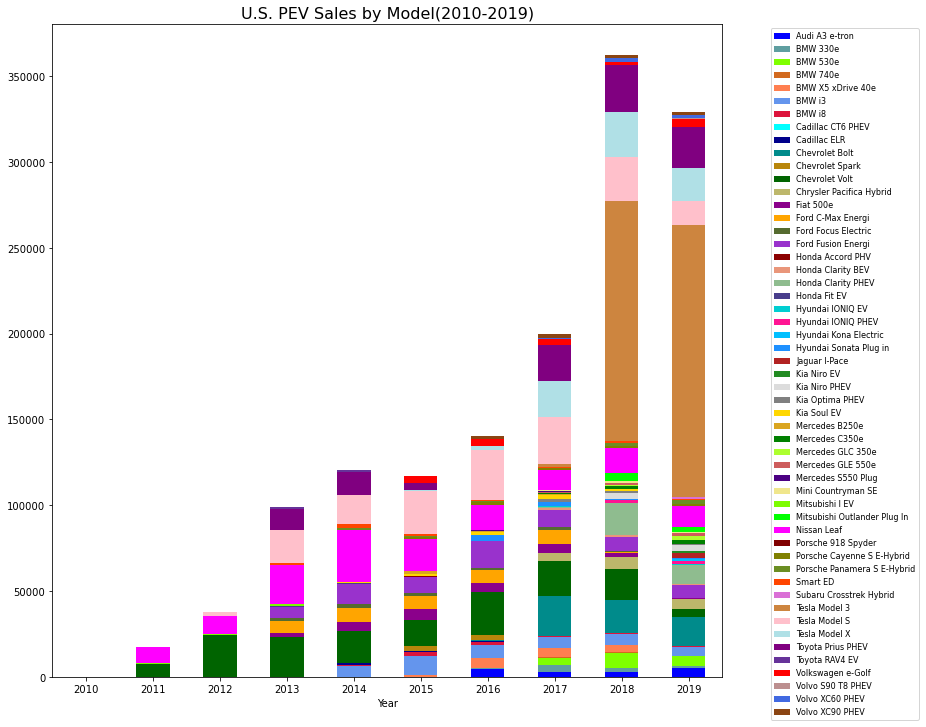

In [12]:
# selected X11/CSS4 colors, do not include those close to white
colors = [
    'blue',
    'cadetblue',
    'chartreuse',
    'chocolate',
    'coral',
    'cornflowerblue',
    'crimson',
    'cyan',
    'darkblue',
    'darkcyan',
    'darkgoldenrod',
    'darkgreen',
    'darkkhaki',
    'darkmagenta',
    'orange',
    'darkolivegreen',
    'darkorchid',
    'darkred',
    'darksalmon',
    'darkseagreen',
    'darkslateblue',
    'darkturquoise',
    'deeppink',
    'deepskyblue',
    'dodgerblue',
    'firebrick',
    'forestgreen',
    'gainsboro',
    'gray',
    'gold',
    'goldenrod',
    'green',
    'greenyellow',
    'indianred',
    'indigo',
    'khaki',
    'lawngreen',
    'lime',
    'magenta',
    'maroon',
    'olive',
    'olivedrab',
    'orangered',
    'orchid',
    'peru',
    'pink',
    'powderblue',
    'purple',
    'rebeccapurple',
    'red',
    'rosybrown',
    'royalblue',
    'saddlebrown',
    'salmon'
]

# create a pivot table that with each vehicle in its own column
pivot = pd.pivot_table(data=sales_till_2019, index=['Year'], columns=['Vehicle'], values='Sum')

# create a stacked bar chart
ax = pivot.plot.bar(stacked=True, rot=0, figsize=(12,12), color=colors)
ax.set_title('U.S. PEV Sales by Model(2010-2019)', fontsize=16)
plt.legend(bbox_to_anchor=(1.3, 1), fontsize=8)
plt.show()

The Nissan Leaf and the Chevrolet Volt were the first 2 PEV models to enter the U.S. market, and were also the mainstream PEV models during 2011-2014. In 2015

Seems the Tesla Model 3 has very high sales numbers since 2018, is it the most selled PEV? So many models make the stacked bar not easy to read. To answer that questions, let's get the list of 10 top selling PEVs.

<a id="top_10_models"></a>
#### 5.1.2 Top 10 models

In [13]:
sales_long_till_2019 = sales_long[sales_long['Year'] <= 2019].copy()
vehicle_grouped = sales_long_till_2019[['Vehicle','Type','Qty']].groupby(['Vehicle', 'Type'])
top_10_model = vehicle_grouped.sum().reset_index().sort_values(by=['Qty'], ascending=False).head(10)
top_10_model

,Vehicle,Type,Qty
44,Tesla Model 3,BEV,300471
45,Tesla Model S,BEV,159766
11,Chevrolet Volt,PHEV,157652
38,Nissan Leaf,BEV,143558
47,Toyota Prius PHEV,PHEV,101756
46,Tesla Model X,BEV,69462
16,Ford Fusion Energi,PHEV,68557
9,Chevrolet Bolt,BEV,59125
5,BMW i3,BEV,41988
14,Ford C-Max Energi,PHEV,39857


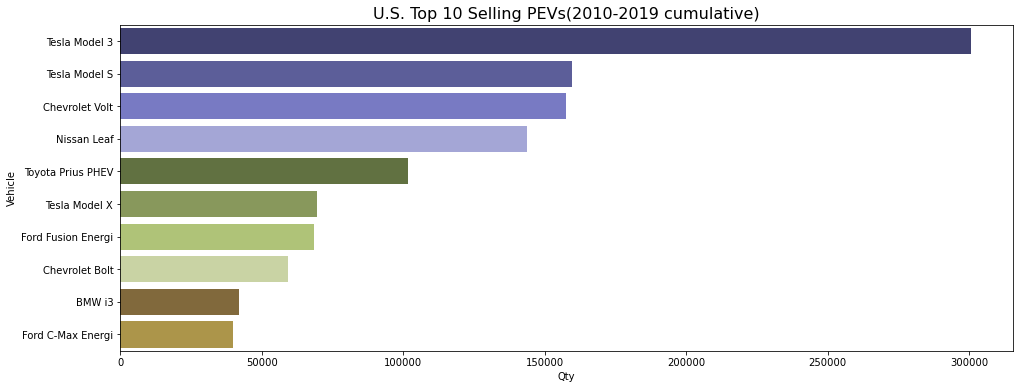

In [14]:
plt.figure(figsize=(16,6))
ax = sns.barplot(y="Vehicle", x="Qty", data=top_10_model, orient='h', palette="tab20b")
ax.set_title('U.S. Top 10 Selling PEVs(2010-2019 cumulative)', fontsize=16)
plt.show()

Next, let's track the sales of top 10 models quarterly.

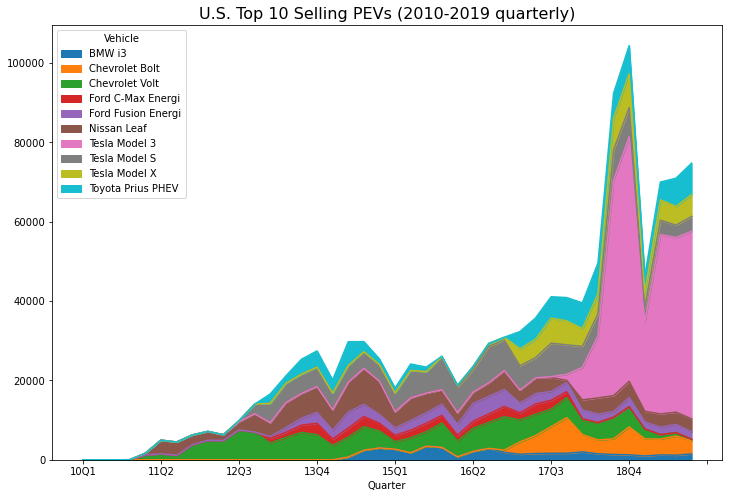

In [15]:
from datetime import datetime

def fetch_quarter(row):
    year = str(row.Year)[-2:]
    datetime_object = datetime.strptime(row.Month, "%b")
    month_number = datetime_object.month
    quarter = str(((month_number-1) // 3) + 1)
    return f"{year}Q{quarter}"

sales_long_till_2019["Quarter"] = sales_long_till_2019.apply(fetch_quarter, axis=1)

# grouped by quarter
vehicle_q_grouped = sales_long_till_2019[['Vehicle','Quarter','Qty']].groupby(['Vehicle', 'Quarter'])
vehicle_q_grouped = vehicle_q_grouped.sum().reset_index()

#get the grouped data of the top 10 vehicles
top_10_q_grouped = vehicle_q_grouped[vehicle_q_grouped['Vehicle'].isin(top_10_model['Vehicle'])].copy()
top_10_q_grouped.sort_values(by=['Quarter'], inplace=True)

# create an area plot
pivot = pd.pivot_table(data=top_10_q_grouped, index=['Quarter'], columns=['Vehicle'], values='Qty')
ax = pivot.plot.area(figsize=(12,8))
ax.set_title('U.S. Top 10 Selling PEVs (2010-2019 quarterly)', fontsize=16)
plt.show()

According to the bar plot and area plot of top 10 vehicles, the Tesla Model 3 was the best-selling plug in electric vehicle and its sales increased greatly in just half year later after it came out.

The sales of other vehicles had small cyclical changes and were left far behind the Tesla Model 3. However, the Tesla Model S, while No.2 in sales, has dipped a bit since the Tesla Model 3 came out.

We've known all 3 Tesla models that launched before 2019 were in the top 10 list, does that also mean Tesla had the highest market share? Let's visualize the sales by maker with another bar chart.

<a id="sales_by_maker"></a>
#### 5.1.3 Sales by maker

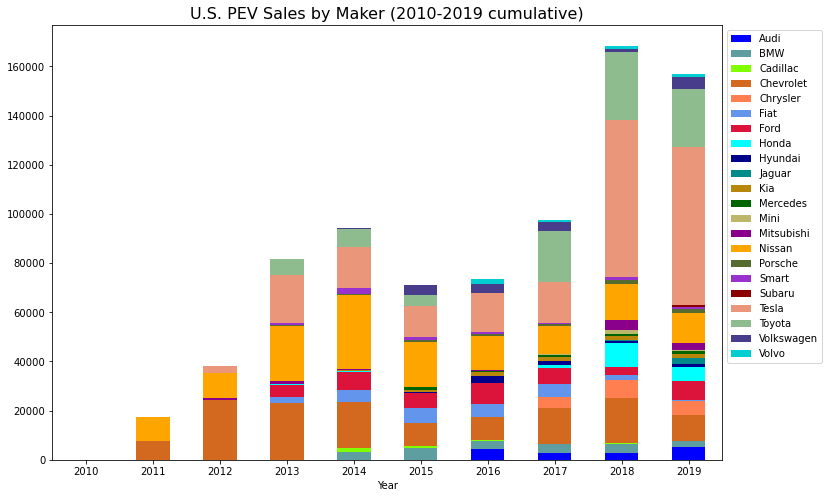

In [16]:
pivot_maker = pd.pivot_table(data=sales_till_2019, index=['Year'], columns=['Maker'], values='Sum')
ax = pivot_maker.plot.bar(stacked=True, rot=0, figsize=(12,8), color=colors)
ax.set_title('U.S. PEV Sales by Maker (2010-2019 cumulative)', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), fontsize=10)
plt.show()

Overall, PEVs sales was increased year over year, even though 2019 had slightly less sales than 2018.
Sales in 2010 were too low to be noticeable.
Between 2011-2012, Chevrolet and Nissan dominated the market. As the time went, more and more automakers joined the competition.
Between 2015-2017, the sales of Tesla were stable and close to Nissan, but since then, the proportion of Tesla had greatly increased.

Next, let's get the list of top 10 makers.

<a id="top_10_makers"></a>
#### 5.1.4 Top 10 makers

In [17]:
# grouped by maker
maker_grouped = sales_long_till_2019[['Maker','Qty']].groupby('Maker')
top_sales = maker_grouped.sum().reset_index().sort_values(by=['Qty'], ascending=False)
qty_sum = top_sales['Qty'].sum()

# calculate the percentage of the top 10 makers
top_sales['Maker_Percentage'] = round(top_sales['Qty'] / qty_sum * 100, 1)
top_10_maker = top_sales.head(10)

# calculate the percentage and sales of the rest makers
rest_share = 100 - top_10_maker['Maker_Percentage'].sum()
rest_sum = qty_sum - top_10_maker['Qty'].sum()
rest_maker = pd.DataFrame([['All the Other Makers', rest_sum, rest_share]])
rest_maker.columns = list(top_10_maker.columns)

# concat them
top_10_rest_maker = pd.concat([top_10_maker, rest_maker])
top_10_rest_maker

,Maker,Qty,Maker_Percentage
18,Tesla,529699,37.2
3,Chevrolet,222464,15.6
14,Nissan,143558,10.1
6,Ford,116976,8.2
19,Toyota,104036,7.3
1,BMW,93285,6.6
7,Honda,35059,2.5
5,Fiat,27211,1.9
20,Volkswagen,18279,1.3
10,Kia,17728,1.2


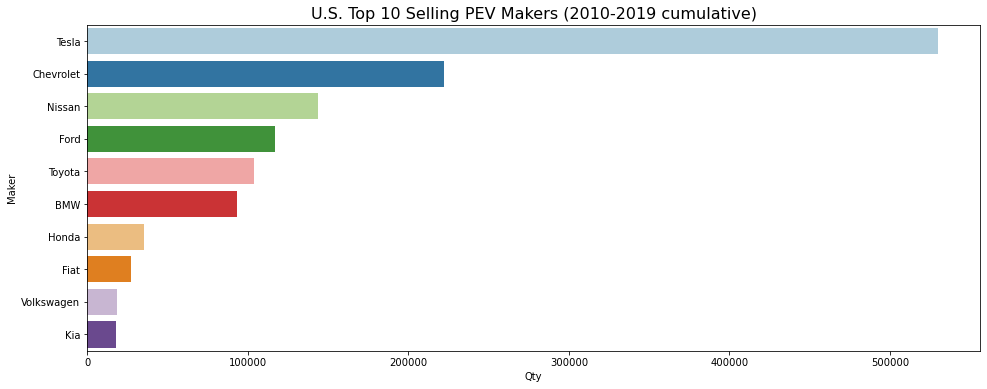

In [18]:
plt.figure(figsize=(16,6))
ax = sns.barplot(y="Maker", x="Qty", data=top_10_maker, orient='h', palette="Paired")
ax.set_title('U.S. Top 10 Selling PEV Makers (2010-2019 cumulative)', fontsize=16)
plt.show()

A pie chart can display each maker's share more clearly.

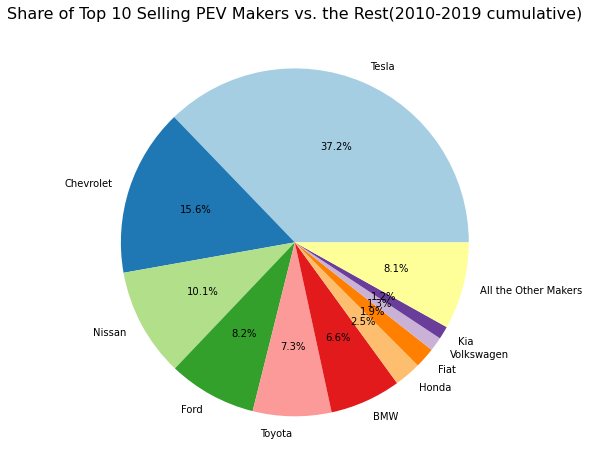

In [19]:
# draw a pie chart
plt.figure(figsize=(8, 8))
palette_color = sns.color_palette('Paired')
plt.pie(top_10_rest_maker.Maker_Percentage, labels=top_10_rest_maker.Maker,
        startangle=0, colors=palette_color, autopct='%1.1f%%')
plt.title('Share of Top 10 Selling PEV Makers vs. the Rest(2010-2019 cumulative)', fontsize=16)
plt.show()

Tesla still ranked the first, followed by Chevrolet. Their sum sales were more than 50% of the total sales.
The PEV market was dominated by the 10 makers. Their sum was around 92%, while the rest of makers was 8% only.   

In the top 10 list, the share of Tesla was even higher than the sum of the makers who ranked 2nd, 3rd and 4th. So more specially, the PEV market was dominated by Tesla.

Is Tesla popular from the beginning? How does its sales change over time? To answer questions like that, a line chart can show the trend more clearly, this time, let's divide the automakers to 2 groups: Tesla and Non Tesla.

<a id="tesla_vs_non"></a>
#### 5.1.5 Tesla vs. Non Tesla

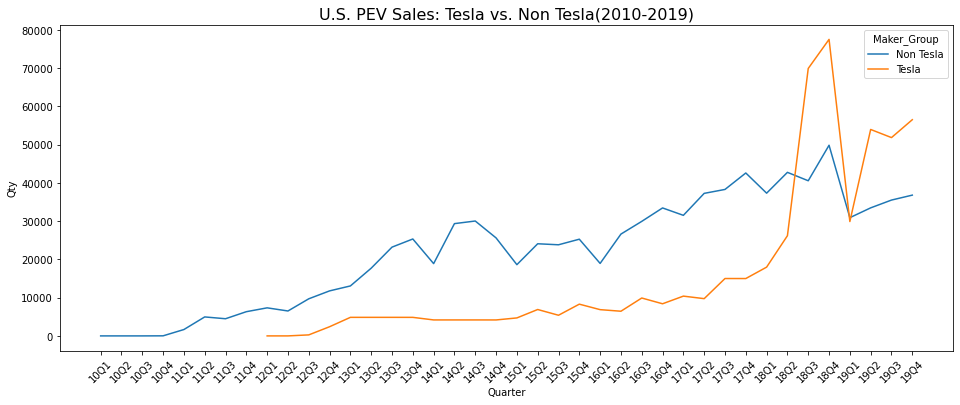

In [20]:
# divide the makers to 2 groups, Tesla and Non Tesla
def get_maker_group(maker):
    if 'Tesla' in maker:
        return 'Tesla'
    else:
        return 'Non Tesla'
    
sales_long_till_2019['Maker_Group'] = sales_long_till_2019['Maker'].apply(get_maker_group)
tesla_maker_grouped = sales_long_till_2019[['Quarter', 'Maker_Group',
        'Qty']].groupby(['Quarter', 'Maker_Group']).sum().reset_index()

# show the trend by line plots
plt.figure(figsize=(16,6))
ax = sns.lineplot(x='Quarter', y='Qty', hue='Maker_Group', data=tesla_maker_grouped)
ax.set_title('U.S. PEV Sales: Tesla vs. Non Tesla(2010-2019)', fontsize=16)
plt.xticks(rotation=45)
plt.show()

From the above line plot, we can see that before 2018, the sales of both Tesla and Non Tesla vehicles were increasing gradully, and Tesla had less share than Non Tesla. The turning point occurred in 2018 Q2, Tesla's sales rose rapidly and higher than Non Tesla in just one quarter. Tesla peaked at 2018 Q4 but in the next quarter, it fell quickly to even a little bit lower than Non Tesla. Then it resumed its uptrend and kept higher market share than Non Tesla makers.

In the top 10 models list, we can see there are 6 BEVs and 4 PHEVs, does it imply BEV is more popular than PHEV? If so, that might be one of the reasons why Tesla is so popular. Let's track their quarterly sales by line plots.

<a id="bev_vs_phev"></a>
#### 5.1.6 BEV vs. PHEV

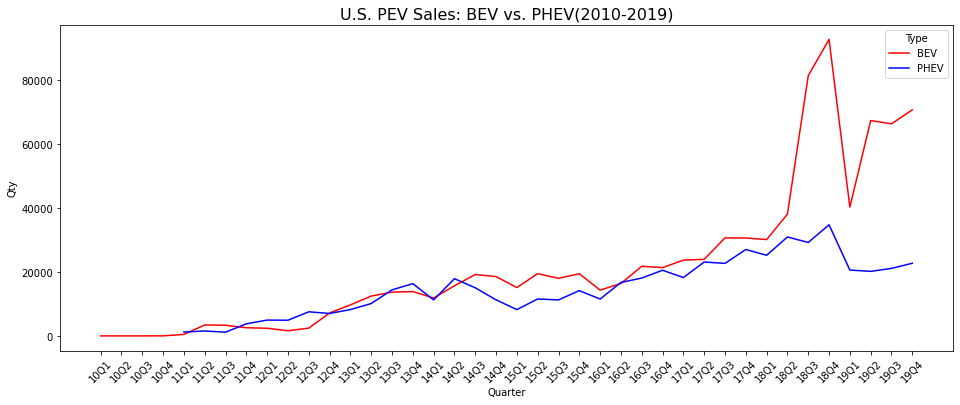

In [21]:
# grouped by Type: BEV or PHEV
type_grouped = sales_long_till_2019.groupby(['Quarter', 'Type']).sum().reset_index()

# show the trend by line plots
plt.figure(figsize=(16,6))
ax = sns.lineplot(x='Quarter', y='Qty', hue='Type', data=type_grouped, palette=['red','blue'])
ax.set_title('U.S. PEV Sales: BEV vs. PHEV(2010-2019)', fontsize=16)
plt.xticks(rotation=45)
plt.show()

Before 2017 Q2, sales of BEV and PHEV were very close, after that, BEV had higher sales and the curve was very similar to Tesla's sales curve. More specially, the high sales of BEV was thanks to the launch of the Tesla Model 3.

In short, Tesla is not popular because it is a BEV, but conversely, BEV is popular because of Tesla.

<a id="sales_by_month"></a>
#### 5.1.7 Sales by month

We already know the sales per year, did the monthly sales make any difference? Before we split the sales by month, we need to do some manipulation:

We can delete the 2010 sales data since it only had one small value in December.

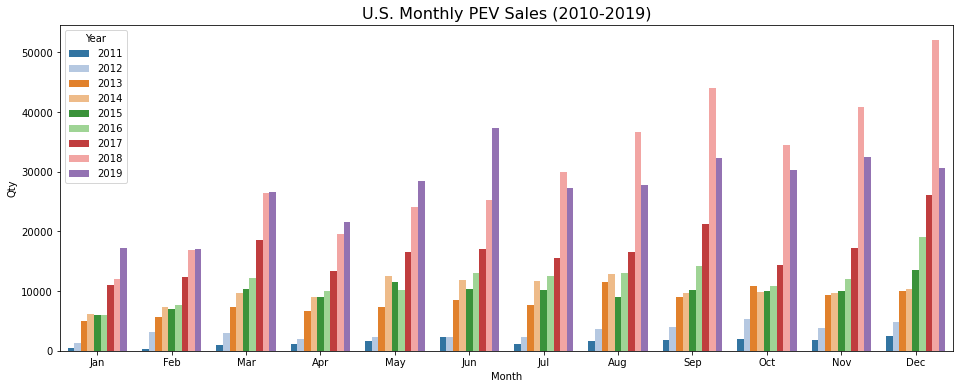

In [22]:
sales_current = sales_long_till_2019[sales_long_till_2019['Year'] > 2010]
month_grouped = sales_current[['Year','Month','Qty']].groupby(['Month', 'Year']).sum().reset_index()

plt.figure(figsize=(16,6))
ax = sns.barplot(
    x='Month',
    y='Qty',
    data=month_grouped,
    order=[
        'Jan',
        'Feb',
        'Mar',
        'Apr',
        'May',
        'Jun',
        'Jul',
        'Aug',
        'Sep',
        'Oct',
        'Nov',
        'Dec',
        ],
    palette='tab20',
    hue='Year',
    )
ax.set_title('U.S. Monthly PEV Sales (2010-2019)', fontsize=16)
plt.show()

In general, 2nd half-year has more sales than 1st half-year, and December sales are usually the highest.
However, sales of 2019 was down since June. That may explains why 2019 had less sales than 2018.

<a id="sup_sales"></a>
### 5.2 Supplement: 2020-2022 sales data

We've known the sales data of 2020-2022 is not as complete as 2010-2019, only a few vehicles have data during 2020-2022, and 2022 has the first quarter data only.

First of all, let's get the list of those vehicles.

In [23]:
sales_selected = sales_long[sales_long['Year'] >= 2020]
sales_selected['Vehicle'].unique()

array(['Audi A3 e-tron', 'BMW i3', 'BMW i8', 'Chevrolet Bolt',
       'Chevrolet Volt', 'Mitsubishi Outlander Plug In', 'Nissan Leaf',
       'Tesla Model 3', 'Tesla Model S', 'Tesla Model X', 'Tesla Model Y',
       'Volkswagen e-Golf'], dtype=object)

All the 3 Tesla models are in the list, with a new model Tesla Model Y. Let's track their sales quarterly.

<a id="all_tesla"></a>
#### 5.2.1 2010-2022 Tesla sales

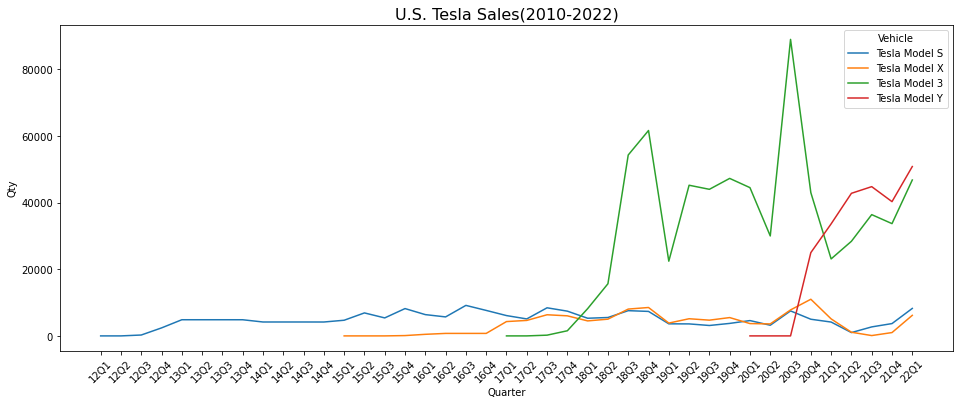

In [24]:
sales_tesla = sales_long[sales_long['Vehicle'].str.contains('Tesla')].copy()
sales_tesla["Quarter"] = sales_tesla.apply(fetch_quarter, axis=1)

# grouped by model
selected_tesla_grouped = sales_tesla[['Vehicle', 'Quarter', 'Qty']].groupby(['Quarter', 'Vehicle']).sum().reset_index()

# show the trend by line plots
plt.figure(figsize=(16,6))
ax = sns.lineplot(x='Quarter', y='Qty', hue='Vehicle', data=selected_tesla_grouped)
ax.set_title('U.S. Tesla Sales(2010-2022)', fontsize=16)
plt.xticks(rotation=45)
plt.show()

Similar to what we've found in the area plot of Top 10 Selling PEVs, the sales of the Tesla Model S and X have been relatively stable and low, while the sales of the Tesla Model 3 are high and its fluctuation is also obvious.

The Tesla Model 3 sets new sales record in 2020 Q3. However, after the Tesla Model Y came out, the sales of Model 3 decreased as Y increased, and Y even exceeded 3 since 2021. Model Y has a tendency to replace Model 3 as the most popular Tesla vehicle, let's wait and see.

We've known Chevrolet and Nissan ranked 2nd and 3rd of the top selling PEV makers in 2010-2019, do they have any changes in recent 3 years?

<a id="all_chev_nissan"></a>
#### 5.2.2 2010-2022 Chevrolet and Nissan sales

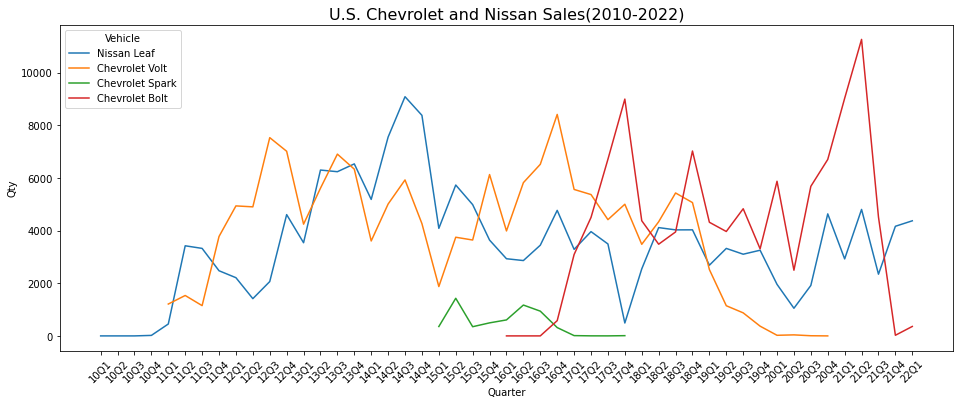

In [25]:
sales_others = sales_long[sales_long['Maker'].str.contains('Chevrolet|Nissan')].copy()
sales_others["Quarter"] = sales_others.apply(fetch_quarter, axis=1)

# grouped by model
others_grouped = sales_others[['Vehicle', 'Quarter', 'Qty']].groupby(['Quarter', 'Vehicle']).sum().reset_index()

# show the trend by line plots
plt.figure(figsize=(16,6))
ax = sns.lineplot(x='Quarter', y='Qty', hue='Vehicle', data=others_grouped)
ax.set_title('U.S. Chevrolet and Nissan Sales(2010-2022)', fontsize=16)
plt.xticks(rotation=45)
plt.show()

Nissan Leaf is relatively stable, even though we don't see an uptrend. The Chevrolet Volt has been discontinued (see [link](https://evadoption.com/ev-models/discontinued-electric-vehicles-evs/)) in 2019, the Chevrolet Spark is earlier.
As for the Chevrolet Bolt, Q2 2021 hit its all-time peak with more than 11,000 units sold. However, its sales have since declined rapidly to close to zero, which is probably due to [recall](https://www.chevrolet.com/electric/bolt-recall). Once its sales resume, it may be a strong competitor for Tesla, let's wait and see.

<a id="summary"></a>
## 6. Summary

- Overall, PEV sales have grown year over year and peaked in 2018 before declining slightly in 2019.
- The Tesla Model 3 was the best-selling plug-in electric vehicle in 2010-2019, followed by the Tesla Model S and Chevrolet Volt.
- Initial sales of BEVs and PHEVs were similar, then the Tesla Model 3 came out and boosted BEV sales significantly.
- In 2010-2019, the PEV market was dominated by the top 10 selling automakers with a total market share of 92%. Among them, Tesla ranked first with 37.2%.
- The Tesla Model Y has a tendency to replace the Model 3 as the most popular Tesla vehicle.
- The Chevrolet Bolt is a strong competitor to Tesla cars.